# converted to mongodb

In [2]:
from pymongo import MongoClient
import matplotlib.pyplot as plt

# Connect to your MongoDB instance
client = MongoClient('mongodb://localhost:27017/')
db = client['vaers']  
collection = db['reports']  

# Plot gender distribution per year (1990-2023)

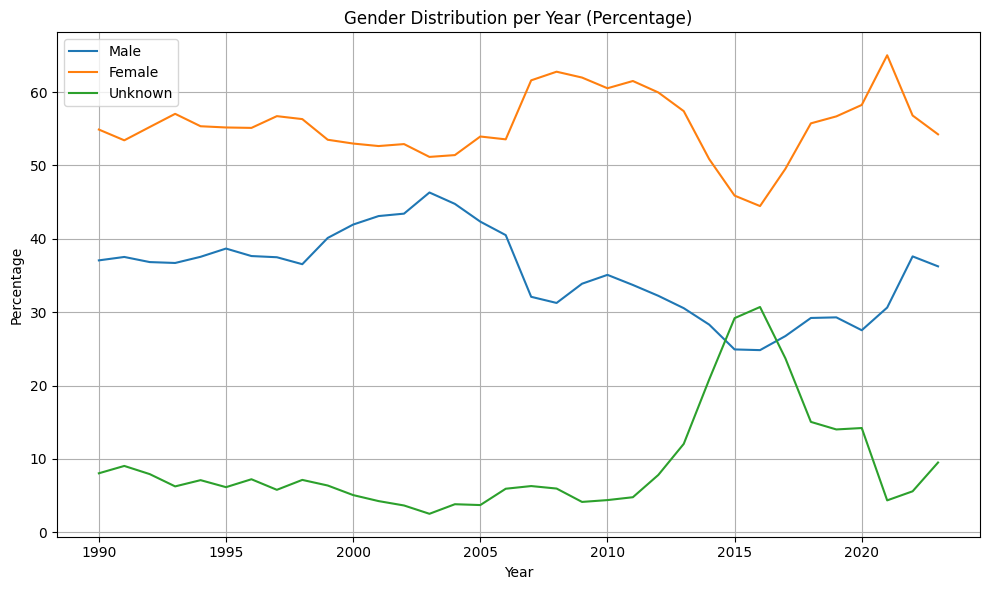

In [5]:
pipeline = [
    {
        "$project": {
            "year": {"$year": "$RECVDATE"},
            "sex": "$SEX"
        }
    },
    {
        "$group": {
            "_id": {"year": "$year", "sex": "$sex"},
            "count": {"$sum": 1}
        }
    },
    {
        "$group": {
            "_id": "$_id.year",
            "gender_counts": {
                "$push": {"sex": "$_id.sex", "count": "$count"}
            },
            "total_count": {"$sum": "$count"}
        }
    },
    {
        "$sort": {"_id": 1}
    }
]

# Execute the aggregation pipeline
gender_distribution_per_year = list(collection.aggregate(pipeline))

# Process the results into a format suitable for plotting
years = []
male_percentages = []
female_percentages = []
unknown_percentages = []

for entry in gender_distribution_per_year:
    year = entry['_id']
    years.append(year)
    total_count = entry['total_count']
    gender_counts = {gender_count['sex']: gender_count['count'] for gender_count in entry['gender_counts']}
    male_percentages.append((gender_counts.get('M', 0) / total_count) * 100)
    female_percentages.append((gender_counts.get('F', 0) / total_count) * 100)
    unknown_percentages.append((gender_counts.get('U', 0) / total_count) * 100)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, male_percentages, label='Male')
plt.plot(years, female_percentages, label='Female')
plt.plot(years, unknown_percentages, label='Unknown')

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Gender Distribution per Year (Percentage)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

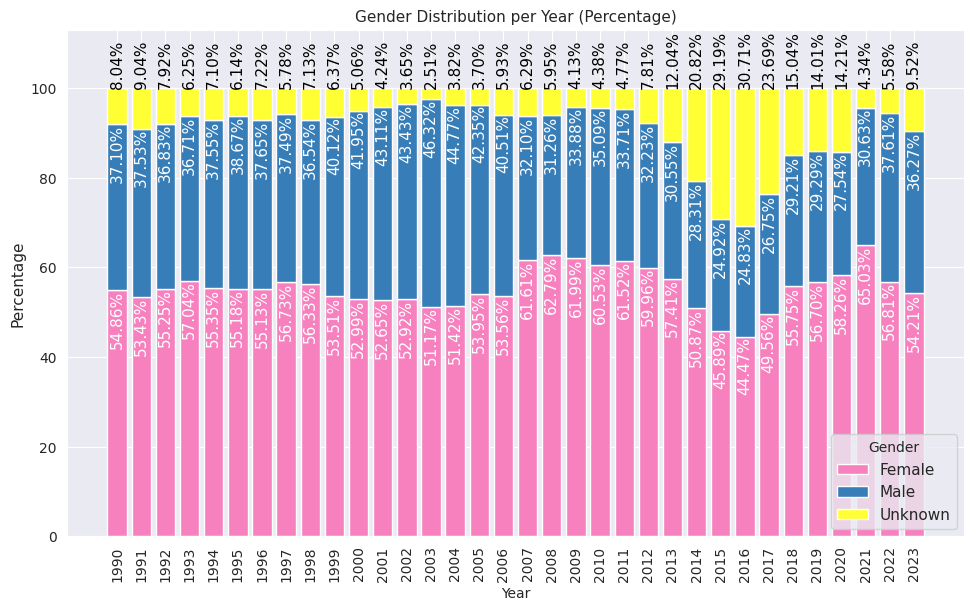

In [47]:
# Define the aggregation pipeline
pipeline = [
    {
        "$project": {
            "year": {"$year": "$RECVDATE"},
            "sex": "$SEX"
        }
    },
    {
        "$group": {
            "_id": {"year": "$year", "sex": "$sex"},
            "count": {"$sum": 1}
        }
    },
    {
        "$group": {
            "_id": "$_id.year",
            "gender_counts": {
                "$push": {"sex": "$_id.sex", "count": "$count"}
            },
            "total_count": {"$sum": "$count"}
        }
    },
    {
        "$sort": {"_id": 1}
    }
]

# Execute the aggregation pipeline
gender_distribution_per_year = list(collection.aggregate(pipeline))

# Process the results into a format suitable for plotting
years = []
male_percentages = []
female_percentages = []
unknown_percentages = []

for entry in gender_distribution_per_year:
    year = entry['_id']
    years.append(year)
    total_count = entry['total_count']
    gender_counts = {gender_count['sex']: gender_count['count'] for gender_count in entry['gender_counts']}
    male_percentages.append((gender_counts.get('M', 0) / total_count) * 100)
    female_percentages.append((gender_counts.get('F', 0) / total_count) * 100)
    unknown_percentages.append((gender_counts.get('U', 0) / total_count) * 100)

colors = plt.cm.Set1.colors

# Plotting
plt.figure(figsize=(10, 6))
bars2 = plt.bar(years, female_percentages, label='Female', color=colors[7])
bars1 = plt.bar(years, male_percentages, bottom=female_percentages, label='Male', color=colors[1])
bars3 = plt.bar(years, unknown_percentages, bottom=[m + f for m, f in zip(male_percentages, female_percentages)], label='Unknown', color=colors[5])


# Add percentage labels at the end of each bar
i = 0
for bars in [bars1, bars2, bars3]:
    i+=1
    for bar in bars:
        height = bar.get_height()
        percentage = f'{height:.2f}%'
        if i == 3: 
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height(), percentage,
                 ha='center', va='bottom', color='black', rotation=90, fontsize = 11)
        else: 
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height(), percentage,
                 ha='center', va='top', color='white', rotation=90, fontsize = 11)
        




# Formatting the plot
plt.ylim(0,113)
plt.xlabel('Year')
plt.ylabel('Percentage', fontsize = 11)
plt.title('Gender Distribution per Year (Percentage)', fontsize = 11)
plt.legend(title='Gender', loc='lower right', fontsize = 11)
plt.tight_layout()
plt.xticks(years, rotation=90)
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Data_Exploration/Gender_Distribution/Gender_Distribution_Per_Year.pdf')
plt.show()


In [45]:
colors

((0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6))

# Gender distribution for Covid-19 vaccinations

<Figure size 1000x600 with 0 Axes>

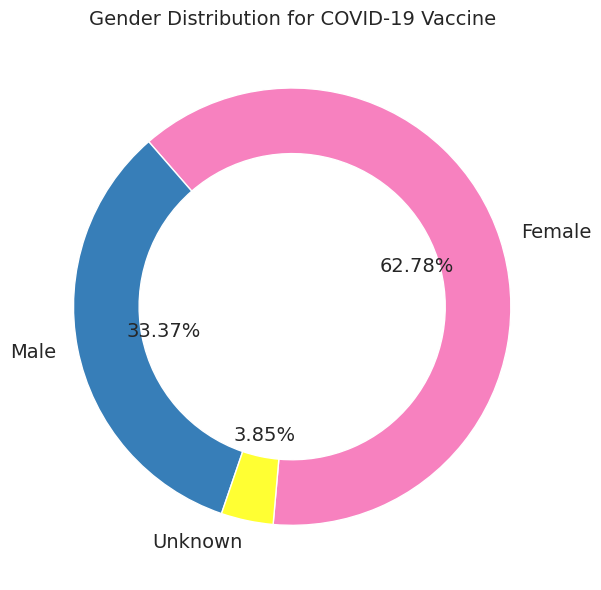

In [48]:
# Define the aggregation pipeline for non-COVID-19 vaccines with unwinding vax_data
pipeline_covid_unwind_all_years = [
    {
        "$match": {"vax_data.VAX_TYPE": {"$regex": "COVID", "$options": "i"}}
    },
    {
        "$group": {
            "_id": {
                "$switch": {
                    "branches": [
                        {"case": {"$eq": ["$SEX", "M"]}, "then": "Male"},
                        {"case": {"$eq": ["$SEX", "F"]}, "then": "Female"},
                    ],
                    "default": "Unknown"
                }
            },
            "count": {"$sum": 1}
        }
    }
]

# Execute the aggregation pipeline for non-COVID-19 vaccines with unwinding vax_data
gender_distribution_covid_unwind_all_years = list(collection.aggregate(pipeline_covid_unwind_all_years))

# Process the results into a format suitable for plotting
total_count_covid_unwind_all_years = sum(entry['count'] for entry in gender_distribution_covid_unwind_all_years)
gender_counts_covid_unwind_all_years = {entry['_id']: entry['count'] / total_count_covid_unwind_all_years * 100 for entry in gender_distribution_covid_unwind_all_years}

# Plotting for non-COVID-19 vaccines with unwinding vax_data
plt.figure(figsize=(10, 6))

colors = plt.cm.Set1.colors
# Custom colors for Female, Male, and Unknown categories
color_mapping = {
    "Male": colors[1],  # Blue
    "Female": colors[7],  # Hot Pink
    "Unknown": colors[5]  # Yellow
}

# Get the colors in the correct order based on the gender_counts keys
colors = [color_mapping[gender] for gender in gender_counts_covid_unwind_all_years.keys()]

# Plotting for non-COVID-19 vaccines with unwinding vax_data
plt.figure(figsize=(10, 6))

# Plotting the pie chart with custom colors
plt.pie(gender_counts_covid_unwind_all_years.values(), labels=gender_counts_covid_unwind_all_years.keys(), autopct='%1.2f%%', startangle=265, wedgeprops={'width': 0.3}, colors=colors, textprops={'fontsize': 14})

# Formatting the plot
plt.title('Gender Distribution for COVID-19 Vaccine', fontsize = 14)
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Data_Exploration/Gender_Distribution/Gender_Distribution_Covid_Vaccinations.pdf')
plt.show()

# Gender distribution for all vaccinations besides Covid-19

<Figure size 1000x600 with 0 Axes>

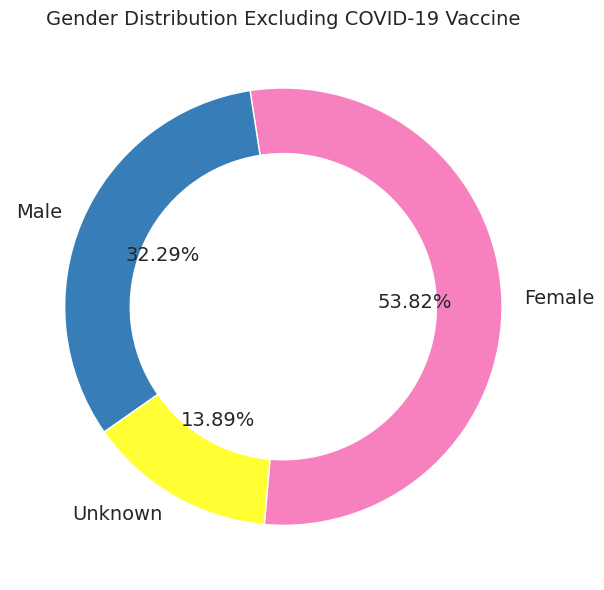

In [49]:
# Define the aggregation pipeline for non-COVID-19 vaccines with unwinding vax_data
pipeline_non_covid_unwind_all_years = [
    {
        "$match": {"vax_data.VAX_TYPE": {"$not": {"$regex": "COVID", "$options": "i"}}}
    },
    {
        "$group": {
            "_id": {
                "$switch": {
                    "branches": [
                        {"case": {"$eq": ["$SEX", "M"]}, "then": "Male"},
                        {"case": {"$eq": ["$SEX", "F"]}, "then": "Female"},
                    ],
                    "default": "Unknown"
                }
            },
            "count": {"$sum": 1}
        }
    }
]

# Execute the aggregation pipeline for non-COVID-19 vaccines with unwinding vax_data
gender_distribution_non_covid_unwind_all_years = list(collection.aggregate(pipeline_non_covid_unwind_all_years))

# Process the results into a format suitable for plotting
total_count_non_covid_unwind_all_years = sum(entry['count'] for entry in gender_distribution_non_covid_unwind_all_years)
gender_counts_non_covid_unwind_all_years = {entry['_id']: entry['count'] / total_count_non_covid_unwind_all_years * 100 for entry in gender_distribution_non_covid_unwind_all_years}

# Plotting for non-COVID-19 vaccines with unwinding vax_data
plt.figure(figsize=(10, 6))

colors = plt.cm.Set1.colors
# Custom colors for Female, Male, and Unknown categories
color_mapping = {
    "Male": colors[1],  # Blue
    "Female": colors[7],  # Hot Pink
    "Unknown": colors[5]  # Yellow
}

# Get the colors in the correct order based on the gender_counts keys
colors = [color_mapping[gender] for gender in gender_counts_non_covid_unwind_all_years.keys()]

# Plotting for non-COVID-19 vaccines with unwinding vax_data
plt.figure(figsize=(10, 6))

# Plotting the pie chart with custom colors
plt.pie(gender_counts_non_covid_unwind_all_years.values(), labels=gender_counts_non_covid_unwind_all_years.keys(), autopct='%1.2f%%', startangle=265, wedgeprops={'width': 0.3}, colors=colors, textprops={'fontsize': 14})


# Formatting the plot
plt.title('Gender Distribution Excluding COVID-19 Vaccine', fontsize = 14)
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Data_Exploration/Gender_Distribution/Non_COVID_Gender_Distribution_Donut.pdf')
plt.show()